## Day 28 Lecture 1 Assignment

In this assignment, we will learn about making predictions with linear models. We will use the king county housing dataset loaded below and analyze the regression from this dataset.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import pylab
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline

import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
king_county = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/kc_house_data.csv')

In [0]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We'll start by adding a column of the log of total sqare feet. This transformation will help us with model assumptions.

In [0]:
# answer below:



king_county['sqfr_total_log'] = np.log(king_county['sqft_living']+king_county['sqft_lot']+king_county['sqft_above']+ king_county['sqft_basement']+ king_county['sqft_living15']+ king_county['sqft_lot15'])

king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqfr_total_log
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,9.615805
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9.985574
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,10.013328
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,9.634300
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,9.939964


Filter out columns and keeping only: price, bedrooms, bathrooms, log_sqft_living, floors, waterfront

In [0]:
# answer below:
king_county['sqft_living_log'] = np.log(king_county['sqft_living'])
X = king_county[['bedrooms', 'bathrooms', 'sqft_living_log', 'floors', 'waterfront']]
y =king_county['price']

Next, we'll check for missing values and remove rows containing missing values. We will also make sure that all our data is numeric and convert the columns that are of object type to numeric. Make sure to remove any rows with missing data resulting from the conversion to numeric.

In [0]:
# answer below:

X.isnull().sum()

bedrooms           0
bathrooms          0
sqft_living_log    0
floors             0
waterfront         0
dtype: int64

Split the data into test and train subsets. Use 20% of the data for the test subset. Use price as the dependent variable.

In [0]:
# answer below:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)


Check the model assumptions: homoscedacity, normal errors, and multicollinearity

In [0]:
#answer below:

import statsmodels.api as sm
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     2672.
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        15:55:14   Log-Likelihood:            -2.4115e+05
No. Observations:               17290   AIC:                         4.823e+05
Df Residuals:                   17284   BIC:                         4.823e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -3.049e+06   5.37e+04    -

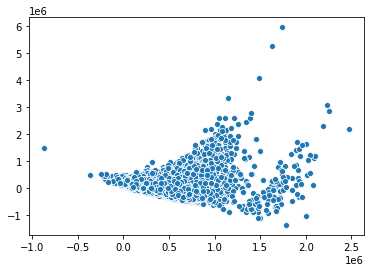

In [0]:
import seaborn as sns
predictions = results.predict(X_train)
residuals = y_train-predictions
sns.scatterplot(predictions, residuals)

There are two model assumptions that fail. One way to fix them is to apply a log transformation to price. Create a new train test split where y is the natural log of price and retest the model assumptions.

In [0]:
# answer below
X1=X.copy()
y_log = np.log(y)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y_log, test_size = .2)

In [0]:
print(y.shape[0], y_log.shape[0], X.shape[0])

21613 21613 21613


Create a linear model and produce a model summary

In [0]:
# answer below

X_train1 = sm.add_constant(X_train1)
results = sm.OLS(y_train1, X_train1).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     3289.
Date:                Wed, 27 May 2020   Prob (F-statistic):               0.00
Time:                        15:55:43   Log-Likelihood:                -7778.1
No. Observations:               17290   AIC:                         1.557e+04
Df Residuals:                   17284   BIC:                         1.561e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               6.8358      0.074     

Predict the y values for the test sample using our model above.

Plot the true vs. predicted values and compute the MAE, MSE, RMSE and MAPE

In [0]:
# answer below:
	
metrics.mean_squared_error
